In [1]:
import os

In [2]:
os.getcwd()

'C:\\Users\\fazlu\\Working_space\\Jupyter_env\\class\\CNN'

In [3]:
ROOT = "'C:\\Users\\fazlu\\Working_space\\Jupyter_env\\class\\CNN'"

In [4]:
os.listdir()

['.git', '.ipynb_checkpoints', 'car1.jpeg', 'CNN.ipynb']

In [5]:
img_path = 'car1.jpeg'

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # image related ops
import numpy as np
import cv2 # opencv lib

In [7]:
car1 = mpimg.imread(img_path)

In [8]:
car1.shape

(168, 300, 3)

In [9]:
type(car1)

numpy.ndarray

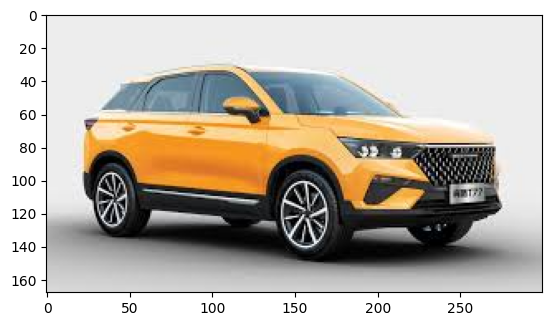

In [10]:
plt.imshow(car1)

In [11]:
car1[0][0]

array([237, 237, 237], dtype=uint8)

In [12]:
car1_cv2 = cv2.imread(img_path)

In [13]:
#cv2.imshow("image", car1_cv2)

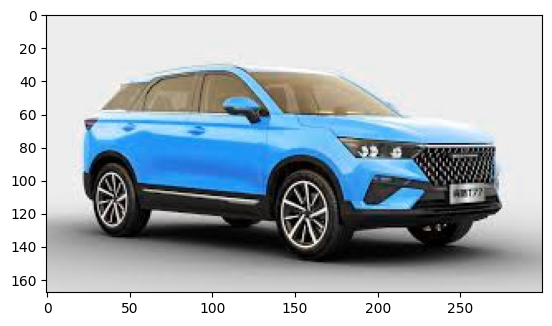

In [14]:
plt.imshow(car1_cv2)

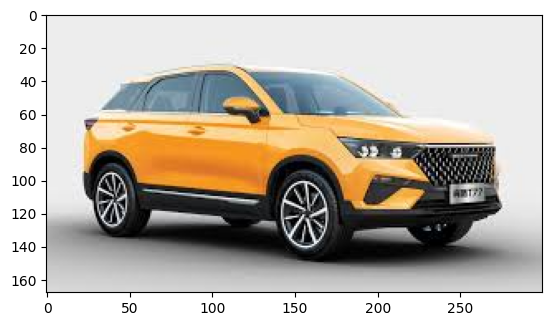

In [15]:
car1_cv2_BGR_RGB = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2_BGR_RGB)

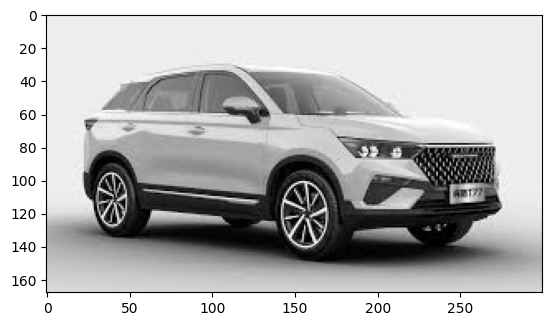

In [16]:
car1_cv2_BGR_GRAY = cv2.cvtColor(car1_cv2, cv2.COLOR_BGR2GRAY)
plt.imshow(car1_cv2_BGR_GRAY, cmap='gray')

In [17]:
car1_cv2_BGR_GRAY.shape

(168, 300)

In [18]:
car1_cv2_BGR_GRAY.min(), car1_cv2_BGR_GRAY.max()

(0, 255)

In [19]:
def viusaliz_RGB_channel(imgArray=None, figsize=(10,7)):
    # splitting the RGB components 
    B,G,R = cv2.split(imgArray)
    
    # create zero matrix of shape of image 
    Z = np.zeros(B.shape, dtype=B.dtype) # can use any channel 
    
    # init subplots 
    
    fig, ax = plt.subplots(2,2, figsize=figsize)
    
    #plotting the actual image and RGB images 
    [axi.set_axis_off() for axi in ax.ravel()]
    
    ax[0,0].set_title("original image")
    ax[0,0].imshow(cv2.merge((R, G, B)))
    
    ax[0,1].set_title("Red channel image")
    ax[0,1].imshow(cv2.merge((R, Z, Z)))
    
    ax[1,0].set_title("Green channel image")
    ax[1,0].imshow(cv2.merge((Z, G, Z)))
    
    ax[1,1].set_title("Blue channel image")
    ax[1,1].imshow(cv2.merge((Z, Z, B)))

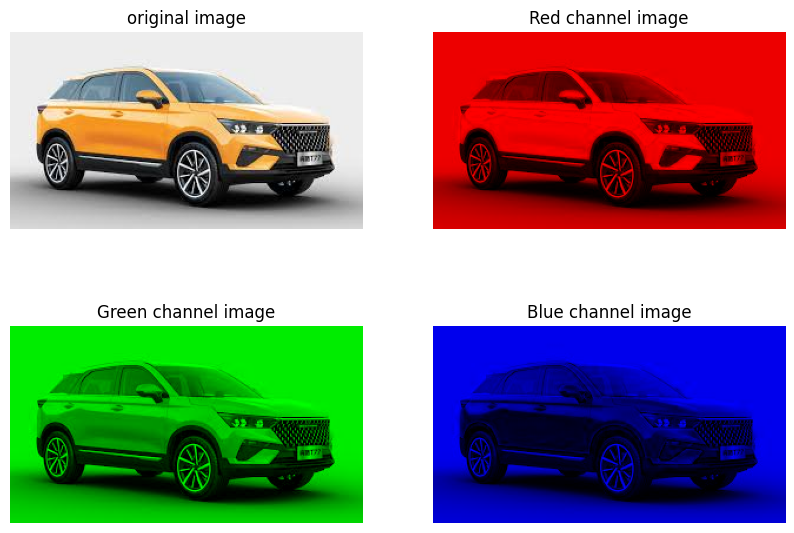

In [20]:
viusaliz_RGB_channel(imgArray=car1_cv2)

In [21]:
random_colored_img = np.random.randint(0,255, (6,6,3))
random_colored_img.shape

(6, 6, 3)

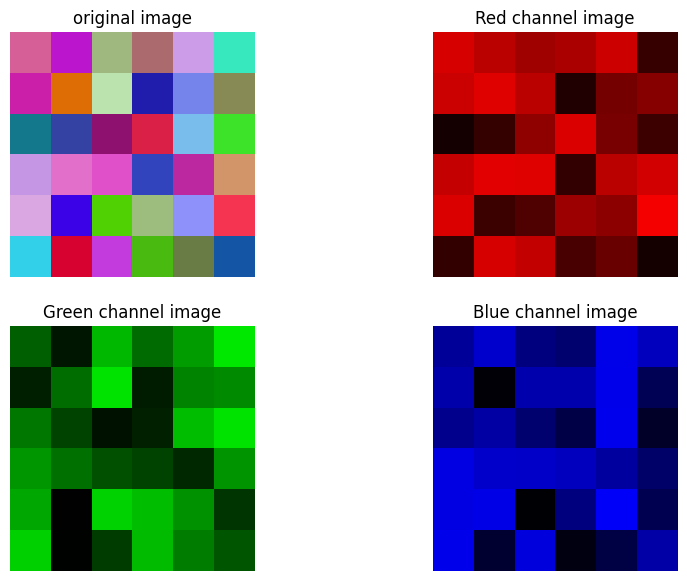

In [22]:
viusaliz_RGB_channel(imgArray=random_colored_img)

In [23]:
random_colored_img

array([[[152,  95, 215],
        [205,  22, 187],
        [127, 184, 159],
        [110, 107, 171],
        [233, 156, 205],
        [189, 231,  55]],

       [[170,  31, 203],
        [  6, 109, 223],
        [173, 227, 187],
        [172,  28,  32],
        [235, 132, 116],
        [ 85, 138, 135]],

       [[140, 120,  20],
        [163,  66,  52],
        [111,  17, 143],
        [ 71,  32, 218],
        [237, 189, 121],
        [ 41, 227,  60]],

       [[227, 150, 196],
        [202, 112, 226],
        [201,  80, 223],
        [190,  67,  50],
        [159,  40, 187],
        [105, 149, 210]],

       [[227, 167, 219],
        [231,   1,  59],
        [  4, 209,  79],
        [126, 189, 157],
        [249, 145, 141],
        [ 81,  52, 245]],

       [[234, 208,  51],
        [ 48,   2, 215],
        [221,  59, 195],
        [ 16, 187,  73],
        [ 69, 124, 105],
        [166,  85,  21]]])

In [24]:
sobel = np.array([[1,0,-1],
                 [2,0,-2],
                 [1,0,-1]])

print("Highlighting vertical edges: \n", sobel)

Highlighting vertical edges: 
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [25]:
print("Highlighting horizontal edges: \n", sobel.T)

Highlighting horizontal edges: 
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [26]:
example1 = [
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,255,255,255,255],
           [0,0,0,0,255,255,255,255,255,255,255,255],
           [0,0,0,0,255,255,255,255,255,255,255,255],
           [0,0,0,0,255,255,255,255,255,255,255,255],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0]
]

In [27]:
example1 = np.array(example1)

In [28]:
example1

array([[  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0],
       [  0,   0,   0,   0, 255, 255, 255, 255,   0,   0,   0,   0]])

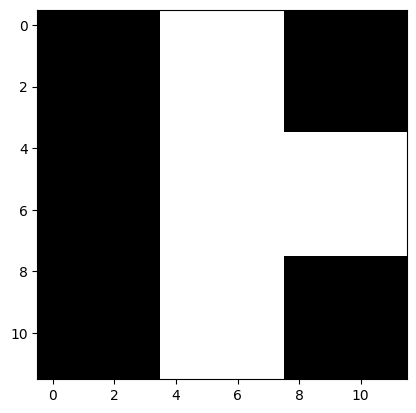

In [29]:
plt.imshow(example1, cmap="gray")

In [30]:
def simple_cnn(imgfilter=None, picture=None):
    # extract the shape of the image
    p_row, p_col = picture.shape
    
    k = imgfilter.shape[0] #k = 3
    
    temp = list() 
    
    stride = 1
    
    # resultant image size 
    
    final_rows = (p_row - k)//stride + 1
    final_cols = (p_col - k)// stride + 1 
    
    # take a vertically down stride accross row by row 
    
    for v_stride in range(final_rows):
        # take a horozontal right stride accross col by col
        for h_stride in range(final_cols):
            target_area_of_pic = picture[v_stride:v_stride+k, h_stride:h_stride + k]
            z = sum(sum(imgfilter * target_area_of_pic))
            temp.append(z)
            
    resultant_image = np.array(temp).reshape(final_rows, final_cols)
    return resultant_image
    

In [31]:
result = simple_cnn(imgfilter=sobel,picture=example1)
result

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,     0,     0,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   255,   255,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,   765,   765,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

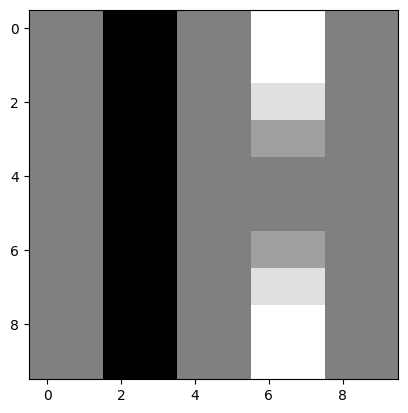

In [32]:
plt.imshow(result, cmap="gray")

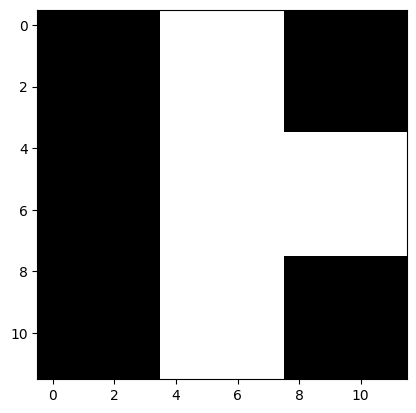

In [33]:
plt.imshow(example1, cmap="gray")

In [34]:
result = simple_cnn(imgfilter=sobel.T,picture=example1)
result

array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,  -255,  -765, -1020,
        -1020],
       [    0,     0,     0,     0,     0,     0,  -255,  -765, -1020,
        -1020],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,   255,   765,  1020,
         1020],
       [    0,     0,     0,     0,     0,     0,   255,   765,  1020,
         1020],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0]])

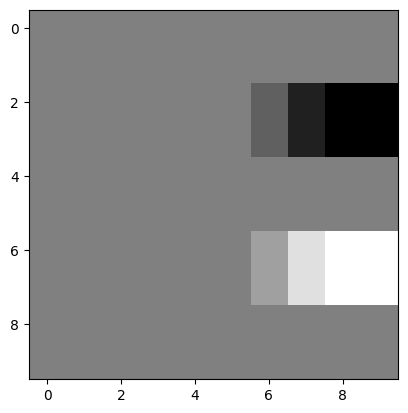

In [35]:
plt.imshow(result, cmap="gray")

In [39]:
example2 = [
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0],
           [0,0,0,0,255,255,255,255,0,0,0,0]
]
example2 = np.array(example2)

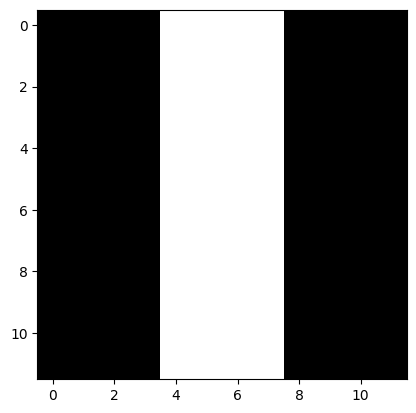

In [40]:
plt.imshow(example2, cmap="gray")

In [41]:
result2 = simple_cnn(imgfilter=sobel,picture=example2)
result2

array([[    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0],
       [    0,     0, -1020, -1020,     0,     0,  1020,  1020,     0,
            0]])

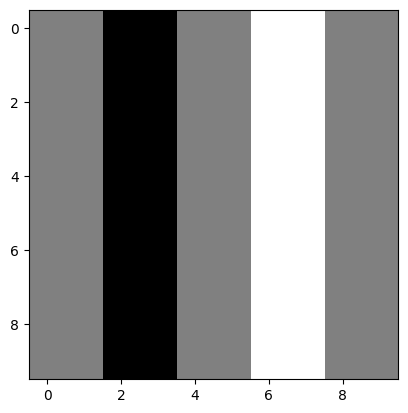

In [42]:
plt.imshow(result2, cmap="gray")

In [43]:
result2 = simple_cnn(imgfilter=sobel.T,picture=example2)
result2

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

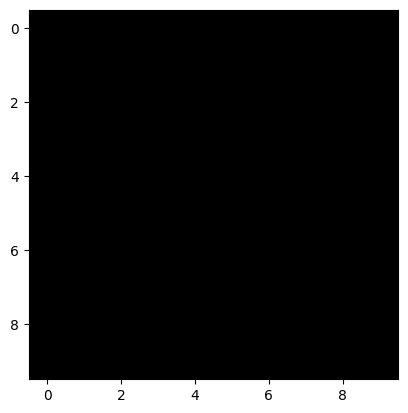

In [44]:
plt.imshow(result2, cmap="gray")

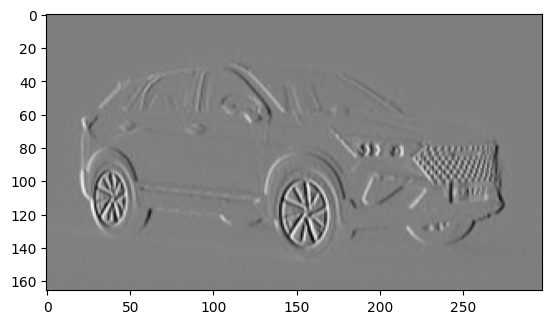

In [45]:
result3 = simple_cnn(imgfilter=sobel,picture=car1_cv2_BGR_GRAY)
plt.imshow(result3, cmap="gray")

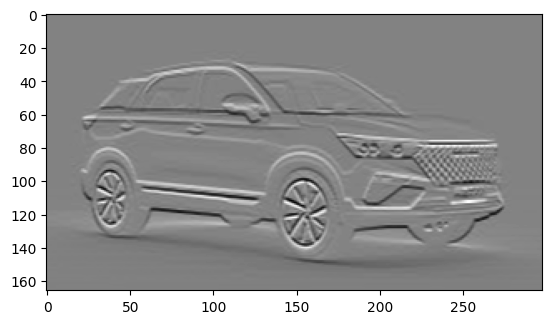

In [46]:
result3 = simple_cnn(imgfilter=sobel.T,picture=car1_cv2_BGR_GRAY)
plt.imshow(result3, cmap="gray")